In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import plotly.express as px

In [39]:
pd.set_option('display.max_columns', 50)

In [40]:
sns.set_style('dark')

In [41]:
df=pd.read_csv("/content/dailymerged.csv")
df.head(20)

,id,activity_date,daily_average_heartrate,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_minutes_asleep,total_sleep_records,total_time_in_bed,bmi,weight_kg,weight_pounds
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,327.0,1.0,346.0,NaN,NaN,NaN
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,384.0,2.0,407.0,NaN,NaN,NaN
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,412.0,1.0,442.0,NaN,NaN,NaN
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,340.0,2.0,367.0,NaN,NaN,NaN
5,1503960366,2016-04-17,NaN,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,700.0,1.0,712.0,NaN,NaN,NaN
6,1503960366,2016-04-18,NaN,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,NaN,NaN,NaN,NaN,NaN,NaN
7,1503960366,2016-04-19,NaN,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,304.0,1.0,320.0,NaN,NaN,NaN
8,1503960366,2016-04-20,NaN,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,360.0,1.0,377.0,NaN,NaN,NaN
9,1503960366,2016-04-21,NaN,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,325.0,1.0,364.0,NaN,NaN,NaN


In [42]:
df.shape

(940, 22)

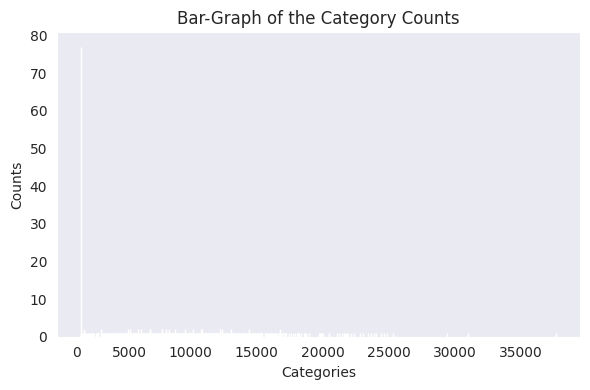

In [43]:
value_counts = df['total_steps'].value_counts()

categories = value_counts.index
counts = value_counts.values

plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color='black')

plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar-Graph of the Category Counts')

plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()


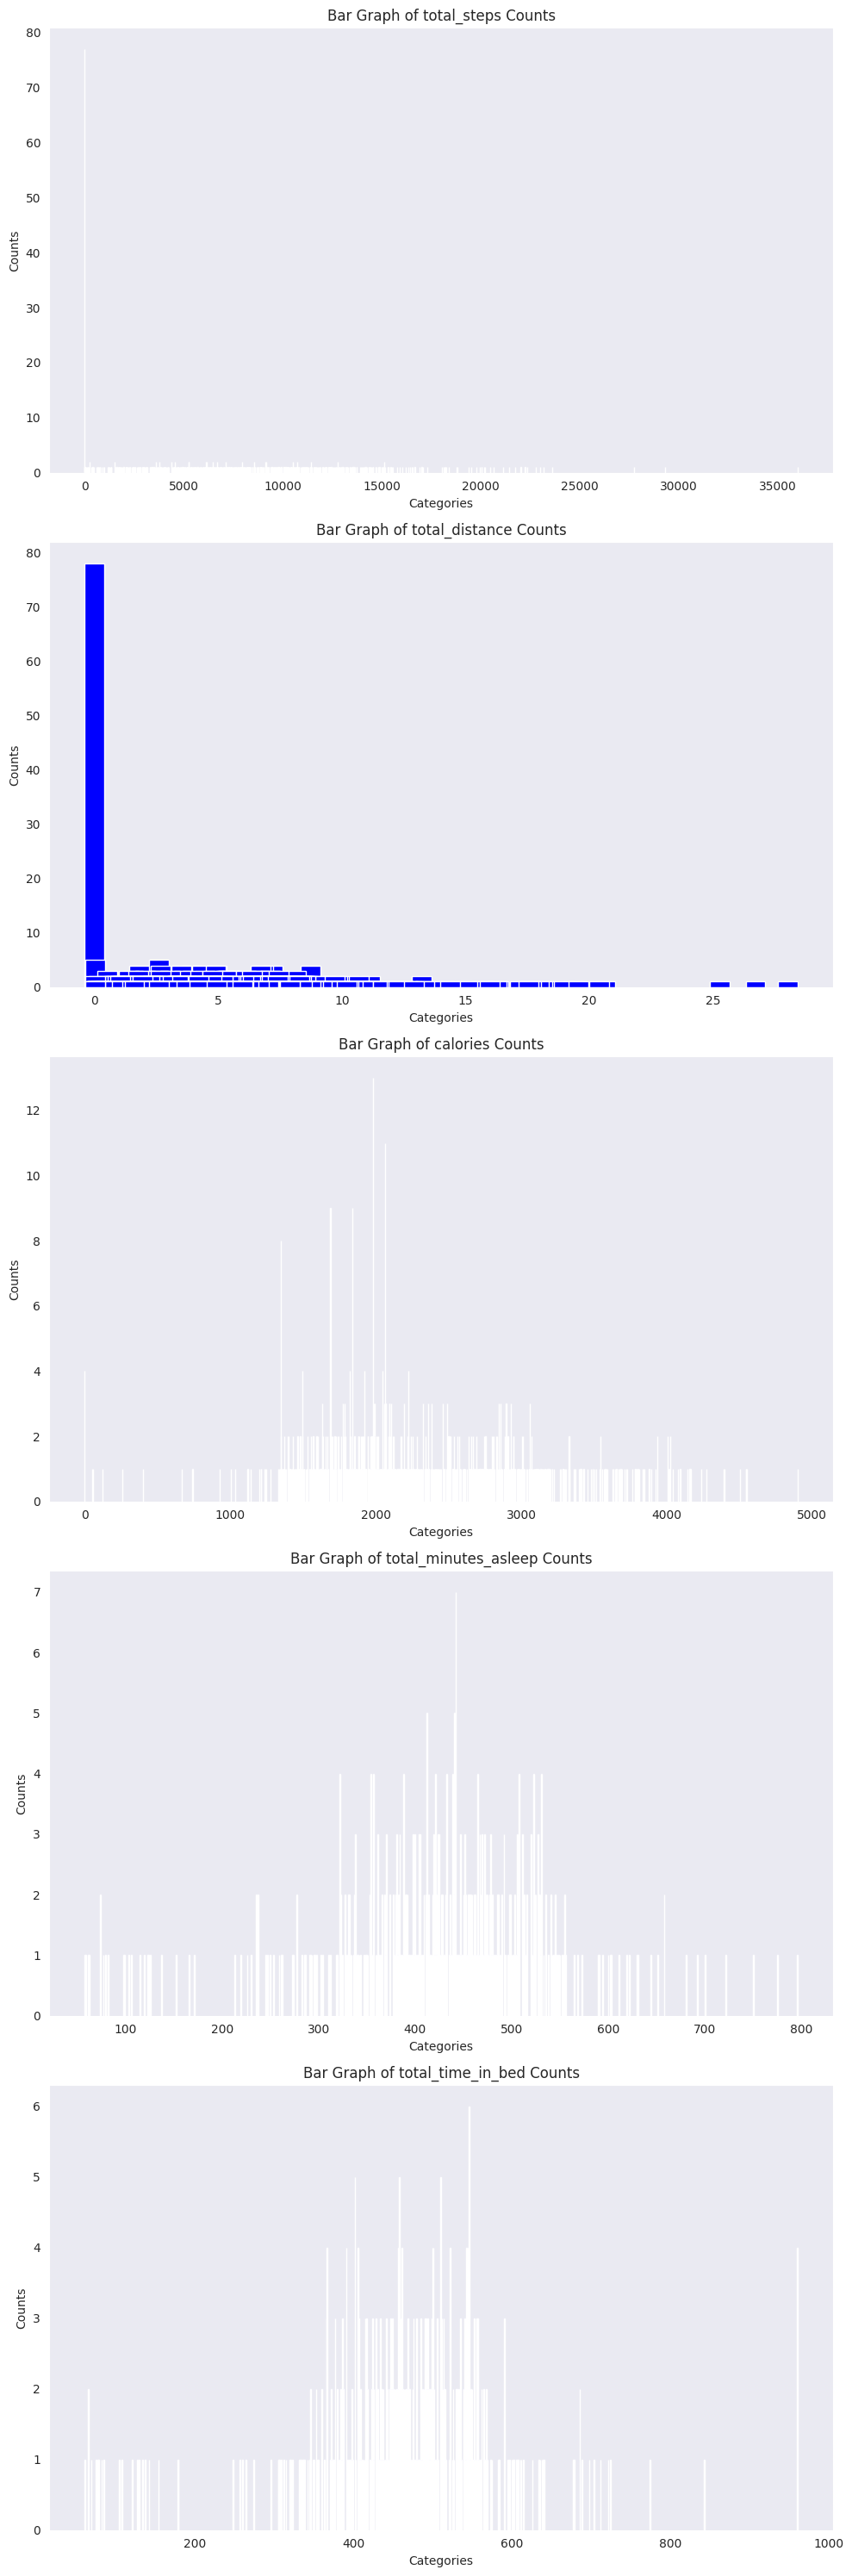

In [44]:
columns_to_visualize = ['total_steps', 'total_distance', 'calories', 'total_minutes_asleep', 'total_time_in_bed']

fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(10, 6*len(columns_to_visualize)))

for i, column in enumerate(columns_to_visualize):
    value_counts = df[column].value_counts()

    categories = value_counts.index
    counts = value_counts.values

    axes[i].bar(categories, counts, color='blue')

    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Counts')
    axes[i].set_title(f'Bar Graph of {column} Counts')

    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


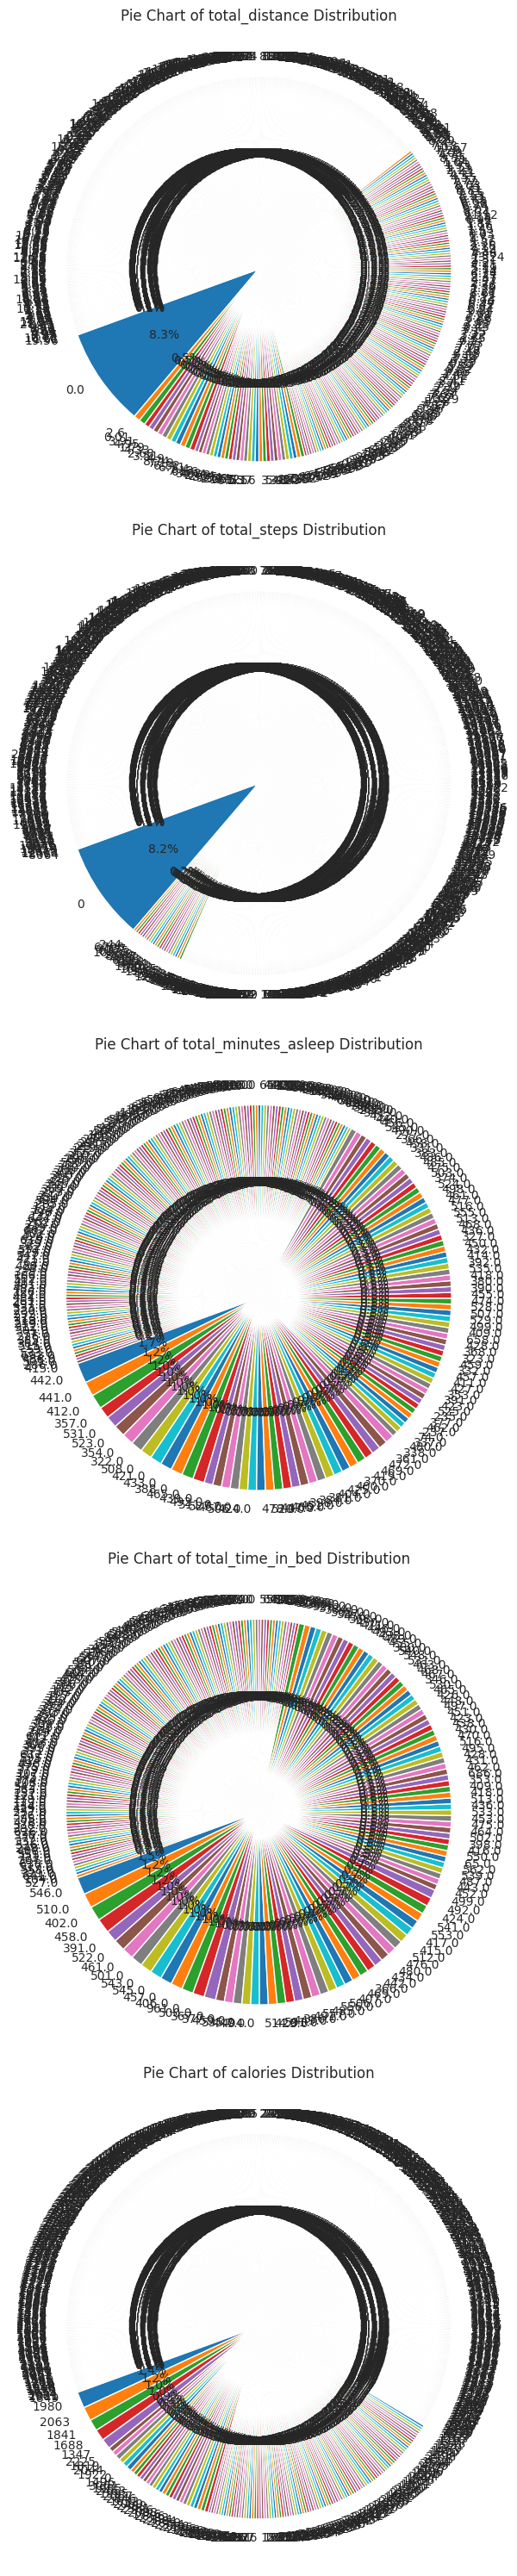

In [47]:
columns_to_visualize = ['total_distance','total_steps','total_minutes_asleep', 'total_time_in_bed', 'calories']

fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(20,6*len(columns_to_visualize)))

for i, column in enumerate(columns_to_visualize):
    value_counts = df[column].value_counts()

    categories = value_counts.index
    counts = value_counts.values

    axes[i].pie(counts, labels=categories, autopct='%1.1f%%', startangle=200)

    axes[i].set_title(f'Pie Chart of {column} Distribution')

plt.tight_layout()

plt.show()


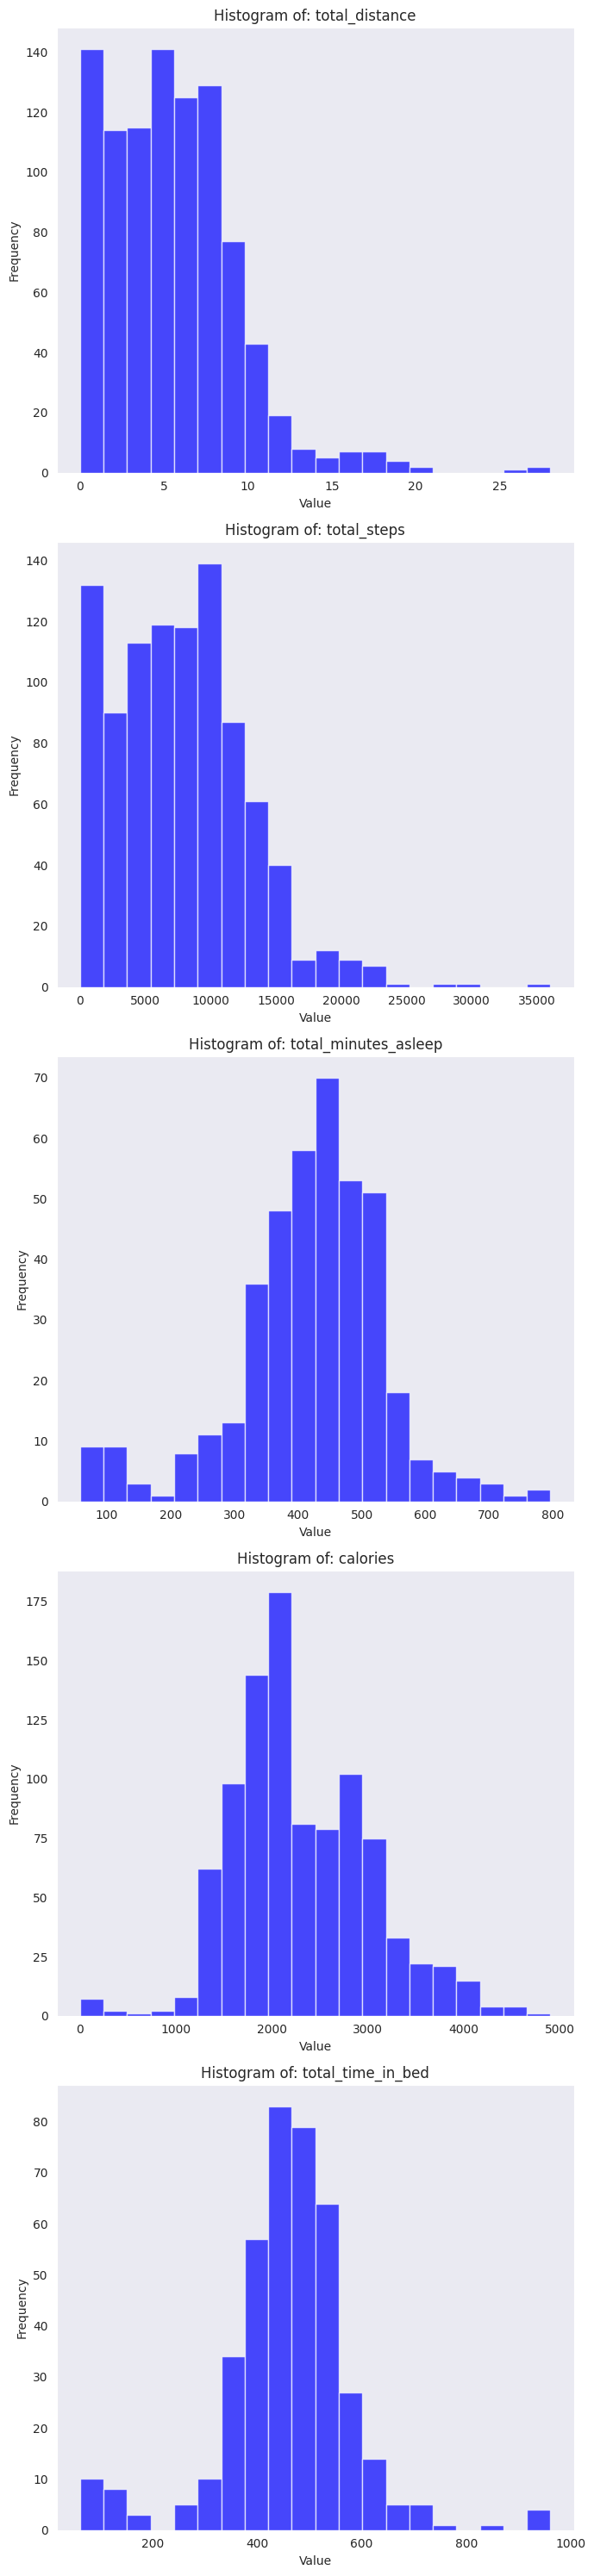

In [48]:
numeric_columns = ['total_distance', 'total_steps', 'total_minutes_asleep','calories', 'total_time_in_bed']

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(7, 6*len(numeric_columns)))

for i, column in enumerate(numeric_columns):
    axes[i].hist(df[column], bins=20, color='blue', alpha=0.7)

    axes[i].set_title(f'Histogram of: {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

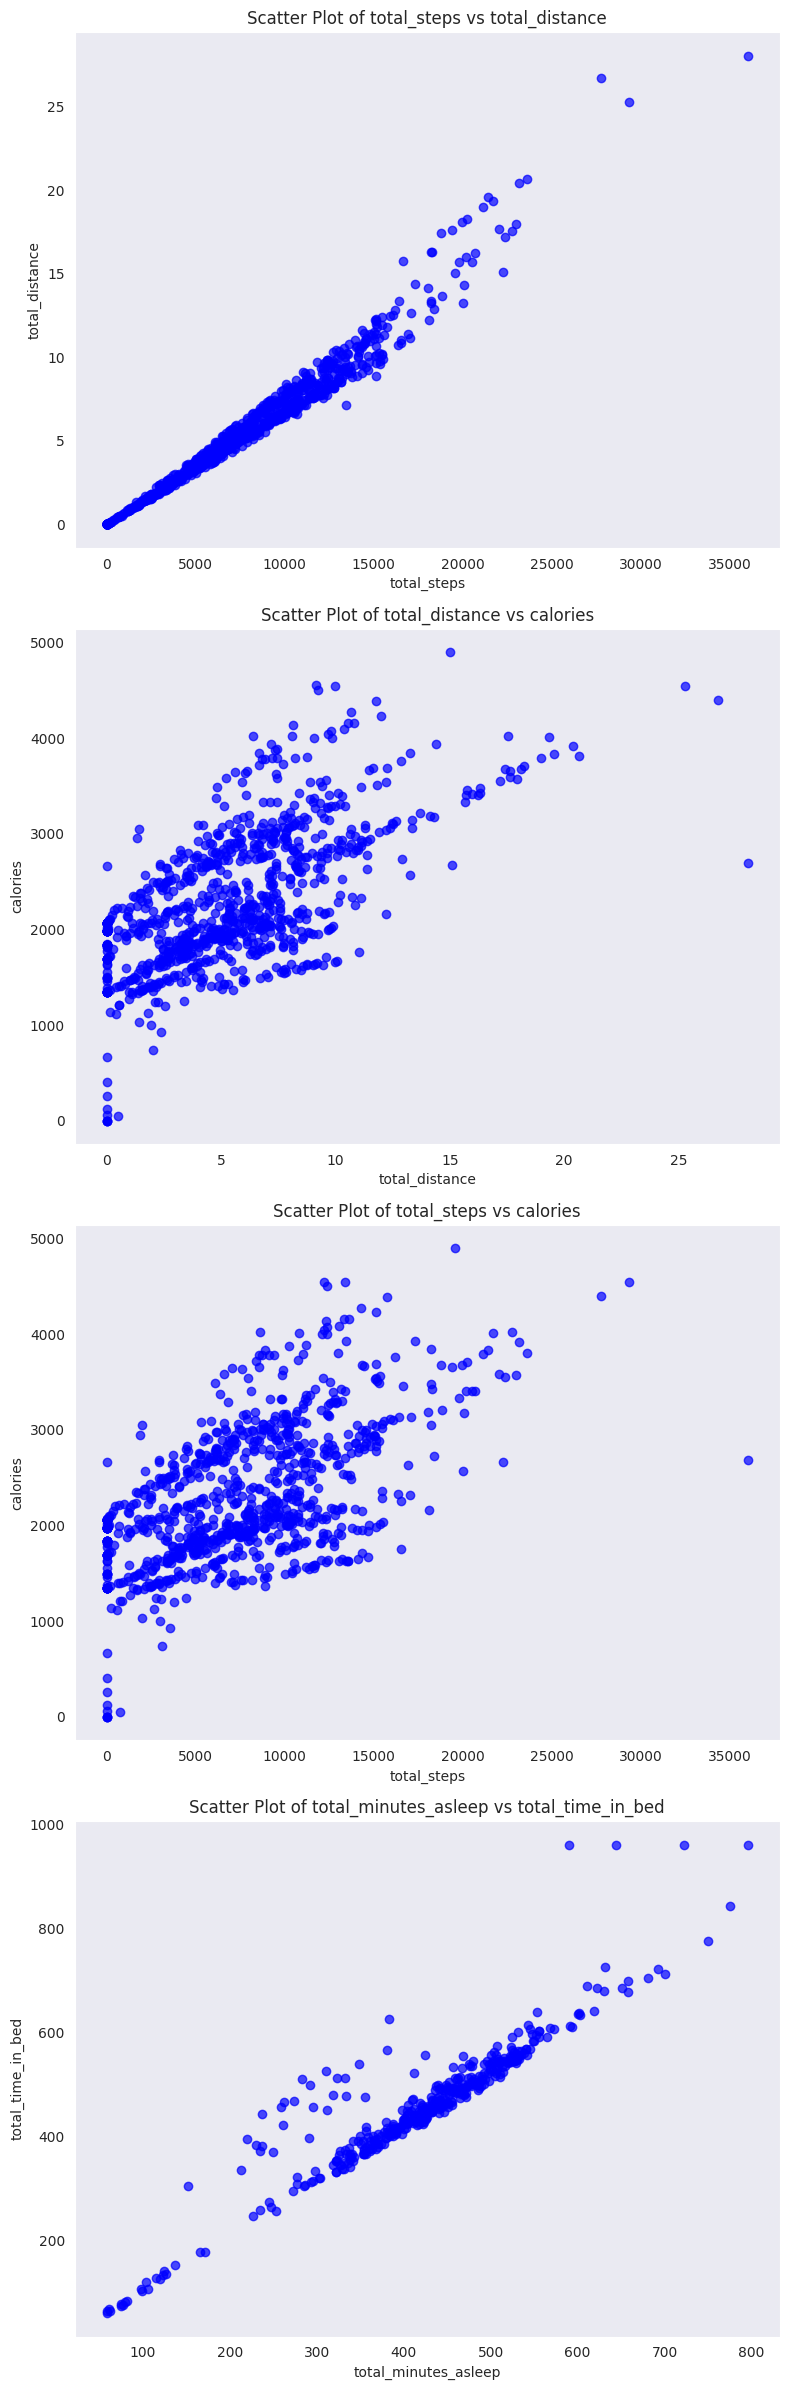

In [49]:
numeric_pairs = [
    ('total_steps', 'total_distance'),
    ('total_distance', 'calories'),
    ('total_steps', 'calories'),
    ('total_minutes_asleep', 'total_time_in_bed')
]

fig, axes = plt.subplots(nrows=len(numeric_pairs), ncols=1, figsize=(8, 6*len(numeric_pairs)))

for i, (x_column, y_column) in enumerate(numeric_pairs):
    axes[i].scatter(df[x_column], df[y_column], color='blue', alpha=0.7)

    axes[i].set_title(f'Scatter Plot of {x_column} vs {y_column}')
    axes[i].set_xlabel(x_column)
    axes[i].set_ylabel(y_column)

plt.tight_layout()
plt.show()